In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [1]:
import cv2
import dlib

print(cv2.__version__)
print(dlib.__version__)

4.1.2
19.18.0


In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

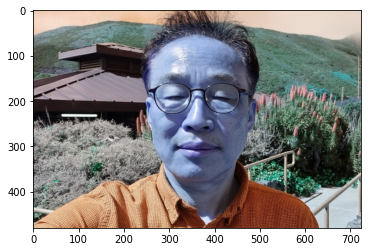

In [4]:
my_image_path = '/content/drive/MyDrive/Colab Notebooks/Aiffel/EXP/Data/me.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
img_show = img_bgr.copy()      # Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄÎ•º Îî∞Î°ú Î≥¥Í¥ÄÌï©ÎãàÎã§
plt.imshow(img_bgr)
plt.show()

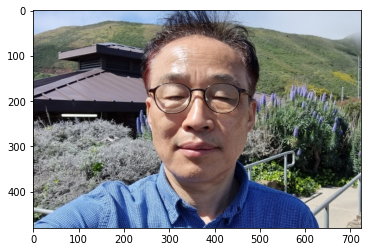

In [5]:
# plt.imshow Ïù¥Ï†ÑÏóê RGB Ïù¥ÎØ∏ÏßÄÎ°ú Î∞îÍæ∏Îäî Í≤ÉÏùÑ ÏûäÏßÄÎßàÏÑ∏Ïöî. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [6]:
# detectorÎ•º ÏÑ†Ïñ∏Ìï©ÎãàÎã§
detector_hog = dlib.get_frontal_face_detector()
print("üå´üõ∏")

üå´üõ∏


In [7]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("üå´üõ∏")

üå´üõ∏


rectangles[[(230, 112) (498, 379)]]


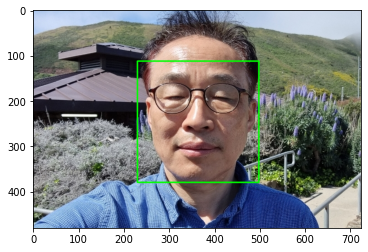

In [8]:
# Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ Î¶¨Ïä§Ìä∏
# Ïó¨Îü¨ ÏñºÍµ¥Ïù¥ ÏûàÏùÑ Ïàò ÏûàÏäµÎãàÎã§
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [9]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

--2022-05-24 13:40:03--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‚Äòshape_predictor_68_face_landmarks.dat.bz2‚Äô

shape_predictor_68_ 100%[===================>]  61.07M  15.6MB/s    in 6.3s    

2022-05-24 13:40:10 (9.70 MB/s) - ‚Äòshape_predictor_68_face_landmarks.dat.bz2‚Äô saved [64040097/64040097]



In [10]:
!ls

drive  sample_data  shape_predictor_68_face_landmarks.dat.bz2


In [11]:
!pwd

/content


In [12]:
model_path = '/content/drive/MyDrive/Colab Notebooks/Aiffel/EXP/Data/exp7-input/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("üå´üõ∏")

üå´üõ∏


In [13]:
list_landmarks = []

# ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ ÎßàÎã§ face landmarkÎ•º Ï∞æÏïÑÎÉÖÎãàÎã§
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark Ï¢åÌëúÎ•º Ï†ÄÏû•Ìï¥Îë°ÎãàÎã§
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


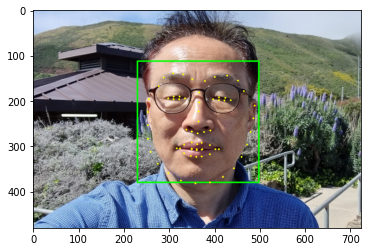

In [14]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [15]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # ÏΩîÏùò indexÎäî 30 ÏûÖÎãàÎã§
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(365, 245)
(x,y) : (365,111)
(w,h) : (269,269)


In [17]:
sticker_path = '/content/drive/MyDrive/Colab Notebooks/Aiffel/EXP/Data/exp7-input/images/king.png'
img_sticker = cv2.imread(sticker_path) # Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(269, 269, 3)


In [18]:
refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (231,-158)


In [19]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (231,0)


In [20]:
# Í∏∏Ïñ¥ÏÑú Î≥µÏû°Ìï¥ Î≥¥Ïù¥ÏßÄÎßå img_show[from:to] ÌòïÏãùÏûÖÎãàÎã§
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
print("Ïäù~")

Ïäù~


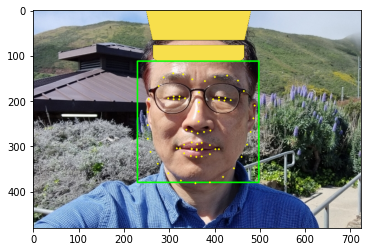

In [21]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

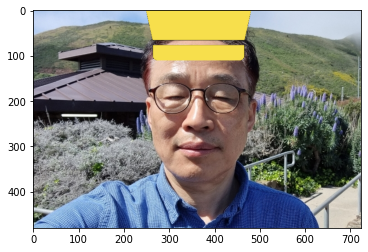

In [22]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()